In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import pandas as pd

In [2]:
image=cv2.imread('lena.bmp')

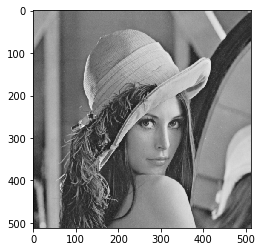

In [3]:
plt.imshow(image)

### Original image and its histogram

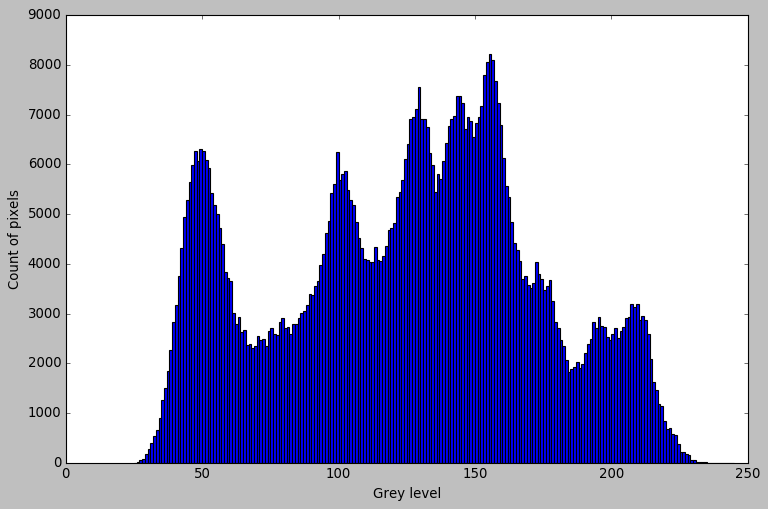

In [12]:
flatten_pixels = np.array([image[r][c][z] for z in range(image.shape[2]) for c in range(image.shape[1]) for r in range(image.shape[0])])
plt.style.use('classic')
fig, ax = plt.subplots(figsize=(11, 7))
ax.hist(flatten_pixels, bins=220)
ax.set_xlabel('Grey level')
ax.set_ylabel('Count of pixels')
plt.savefig('HW2-1-h.jpg', dpi=300)

### Image with intensity divided by 3 and its histogram (b)

In [3]:
image_d3=np.zeros((image.shape[0],image.shape[1],image.shape[2]), dtype=np.int)

In [4]:
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        for k in range(image.shape[2]):
            image_d3[i][j][k]=int((image[i][j][k])/3)

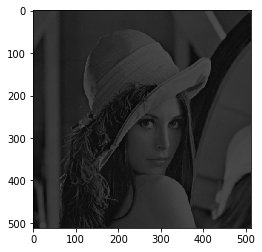

In [56]:
plt.imshow(image_d3)

In [57]:
file_name="HW3-2.jpg"
cv2.imwrite(file_name, image_d3)

True

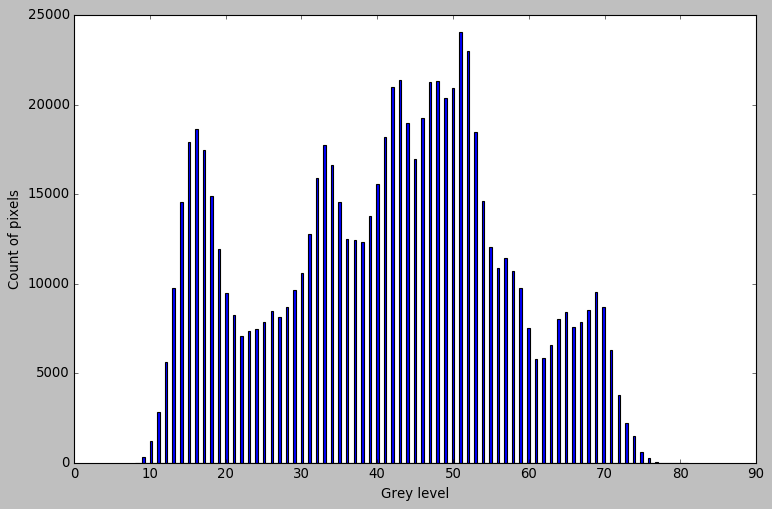

In [5]:
flatten_pixels_d3 = np.array([image_d3[r][c][z] for z in range(image_d3.shape[2]) for c in range(image_d3.shape[1]) for r in range(image_d3.shape[0])])
plt.style.use('classic')
fig, ax = plt.subplots(figsize=(11, 7))
ax.hist(flatten_pixels_d3, bins=220)
ax.set_xlabel('Grey level')
ax.set_ylabel('Count of pixels')
plt.savefig('HW3-2-h.jpg', dpi=300)

### Image after applying histogram equalization to (b) and its histogram

In [5]:
zeros_table=np.zeros(256)

In [6]:
for i in range(image_d3.shape[0]):
    for j in range(image_d3.shape[1]):
        for k in range(image_d3.shape[2]):
            zeros_table[image_d3[i][j][k]]=zeros_table[image_d3[i][j][k]]+1

In [7]:
def equalization(table,level,total):
    sk=0
    for i in range(level):
        sk=sk+table[i]
    sk=(sk*255)/total
    return sk

In [8]:
image_d3_el=np.zeros([image.shape[0],image.shape[1],image.shape[2]], dtype=np.int)
dim=image_d3.shape[0]*image_d3.shape[1]*image_d3.shape[2]
for i in range(image_d3_el.shape[0]):
    for j in range(image_d3_el.shape[1]):
        for k in range(image_d3_el.shape[2]):
            image_d3_el[i][j][k]=equalization(zeros_table,image_d3[i][j][k],dim)

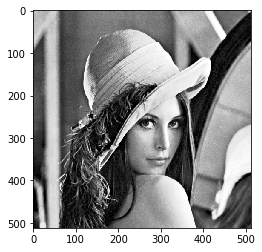

In [9]:
plt.imshow(image_d3_el)

In [77]:
file_name="HW3-3.jpg"
cv2.imwrite(file_name, image_d3_el)

True

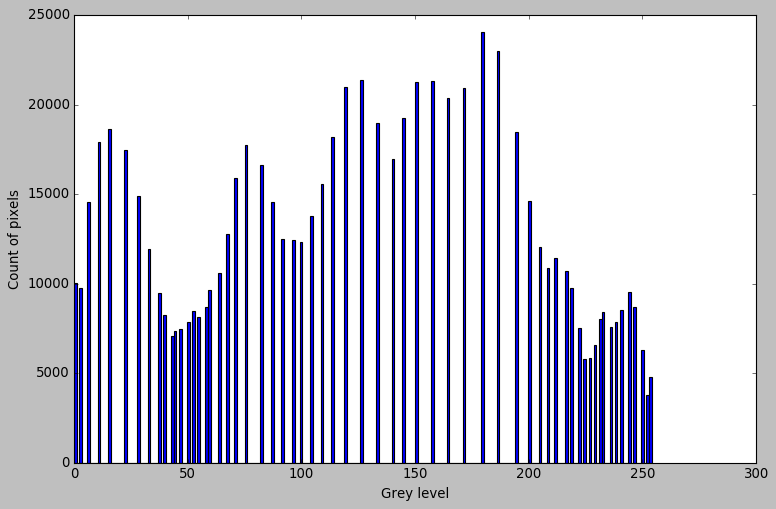

In [10]:
flatten_pixels_d3_el = np.array([image_d3_el[r][c][z] for z in range(image_d3_el.shape[2]) for c in range(image_d3_el.shape[1]) for r in range(image_d3_el.shape[0])])
plt.style.use('classic')
fig, ax = plt.subplots(figsize=(11, 7))
ax.hist(flatten_pixels_d3_el, bins=220)
ax.set_xlabel('Grey level')
ax.set_ylabel('Count of pixels')
plt.savefig('HW3-3-h.jpg', dpi=300)